# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [20]:
tab1 = pd.crosstab(df['sex'], df['flag_doente'], margins= True)
tab1

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [21]:
tab1['Percent doentes'] = tab1[1]/tab1['All']
tab1['Odds'] = tab1[1]/tab1[0]
tab1['Odds ratio'] = tab1['Odds']/tab1.loc['All','Odds']
tab1['Logito'] = np.log(tab1['Odds'])
tab1['WOE'] = np.log(tab1['Odds ratio'])

tab1

flag_doente,0,1,All,Percent doentes,Odds,Odds ratio,Logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```(groupby)

In [35]:
df['age_group'] = pd.qcut(df['age'], 5)

tab2 = pd.crosstab(df['age_group'], df['flag_doente'], margins= True)
tab2

flag_doente,0,1,All
age_group,,,
"(28.999, 45.0]",47,16,63
"(45.0, 53.0]",42,22,64
"(53.0, 58.0]",32,39,71
"(58.0, 62.0]",13,32,45
"(62.0, 77.0]",30,30,60
All,164,139,303


In [36]:
tab2['Percent doentes'] = tab2[1]/tab2['All']
tab2['Odds'] = tab2[1]/tab2[0]
tab2['Odds ratio'] = tab2['Odds']/tab2.loc['All','Odds']
tab2['Logito'] = np.log(tab2['Odds'])
tab2['WOE'] = np.log(tab2['Odds ratio'])

tab2

flag_doente,0,1,All,Percent doentes,Odds,Odds ratio,Logito,WOE
age_group,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [37]:
tab2['Média da Idade'] = df.groupby('age_group')['age'].mean()
tab2

C:\Users\lucia\AppData\Local\Temp\ipykernel_25108\1414072863.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tab2['Média da Idade'] = df.groupby('age_group')['age'].mean()


flag_doente,0,1,All,Percent doentes,Odds,Odds ratio,Logito,WOE,Média da Idade
age_group,,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166,41.222222
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235,50.000000
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218,56.211268
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179,60.355556
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392,66.516667
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,NaN


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

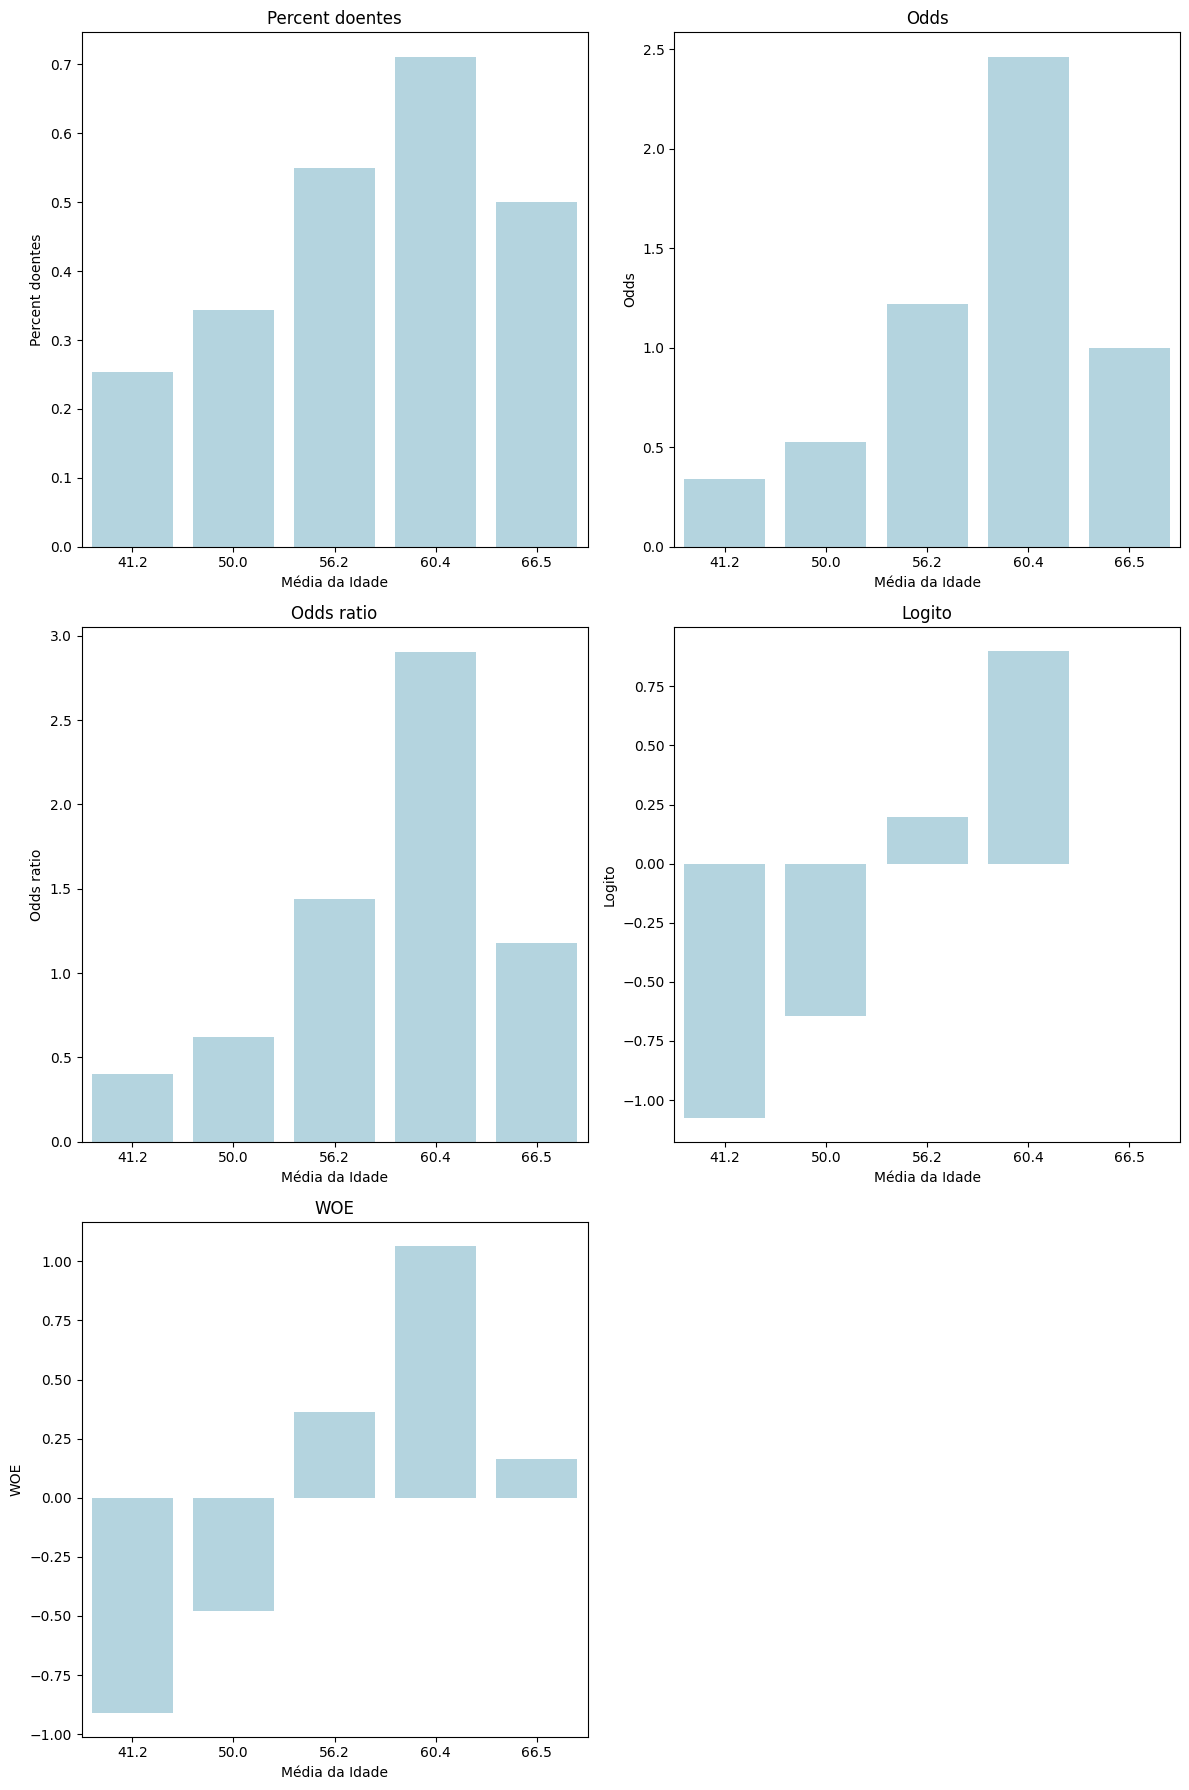

In [47]:
import seaborn as sns

tab2['Média da Idade'] = tab2['Média da Idade'].round(1)
tab2.index = tab2.index.astype(str)
fig, axs = plt.subplots(3, 2, figsize=(12, 18))
color = 'lightblue'

#Percent doentes
sns.barplot(x=tab2['Média da Idade'], y=tab2['Percent doentes'], ax=axs[0, 0], color=color)
axs[0, 0].set_title('Percent doentes')

#Odds
sns.barplot(x=tab2['Média da Idade'], y=tab2['Odds'], ax=axs[0, 1], color=color)
axs[0, 1].set_title('Odds')

#Odds ratio
sns.barplot(x=tab2['Média da Idade'], y=tab2['Odds ratio'], ax=axs[1, 0], color=color)
axs[1, 0].set_title('Odds ratio')

#Logito
sns.barplot(x=tab2['Média da Idade'], y=tab2['Logito'], ax=axs[1, 1], color=color)
axs[1, 1].set_title('Logito')

#WOE
sns.barplot(x=tab2['Média da Idade'], y=tab2['WOE'], ax=axs[2, 0], color=color)
axs[2, 0].set_title('WOE')

fig.delaxes(axs[2, 1]) # Remover o subplot não utilizado
plt.tight_layout()
plt.show()
